In [1]:
#importing required packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


In [2]:
#reading csv
df = pd.read_csv('train_ver2.csv',low_memory=False)

In [3]:
#using only sample rows
df_new = df.sample(frac=0.004,random_state=42)



In [4]:
df_new.shape

(54589, 48)

In [5]:
df_new.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [6]:
old_columns = list(df_new.columns)

new_columns = ['Date','Customer_Code','Employee_Index','Country','Gender','Age','First_holder_Date','New_Customer_Index',\
               'Customer_Seniority','Primary_Customer','Last_date_as_primary_customer','Customer_type_beginning_of_month',\
               'Customer_relation_month_begining','Residence_index','Foreigner_index','Spouse_index',\
               'Joining_channel','Deceased_index','primary_address','Province_code','Province_name','Active_OrNot',\
               'HouseHold_Gross_Income','Segmentation','Saving_Account',\
               'Guarantees','Current_Accounts','Derivada_Account','Payroll_Account','Junior_Account',\
               'Más_particular_Account','particular_Account','particular_Plus_Account','Short_term_deposits','Medium_term_deposits',\
               'Long_term_deposits','e_account','Funds','Mortgage','Pensions','Loans','Taxes','Credit_Card','Securities',\
               'Home_Account','Payroll','Pensions','Direct_Debit' ]

In [7]:
list(zip(old_columns,new_columns))

[('fecha_dato', 'Date'),
 ('ncodpers', 'Customer_Code'),
 ('ind_empleado', 'Employee_Index'),
 ('pais_residencia', 'Country'),
 ('sexo', 'Gender'),
 ('age', 'Age'),
 ('fecha_alta', 'First_holder_Date'),
 ('ind_nuevo', 'New_Customer_Index'),
 ('antiguedad', 'Customer_Seniority'),
 ('indrel', 'Primary_Customer'),
 ('ult_fec_cli_1t', 'Last_date_as_primary_customer'),
 ('indrel_1mes', 'Customer_type_beginning_of_month'),
 ('tiprel_1mes', 'Customer_relation_month_begining'),
 ('indresi', 'Residence_index'),
 ('indext', 'Foreigner_index'),
 ('conyuemp', 'Spouse_index'),
 ('canal_entrada', 'Joining_channel'),
 ('indfall', 'Deceased_index'),
 ('tipodom', 'primary_address'),
 ('cod_prov', 'Province_code'),
 ('nomprov', 'Province_name'),
 ('ind_actividad_cliente', 'Active_OrNot'),
 ('renta', 'HouseHold_Gross_Income'),
 ('segmento', 'Segmentation'),
 ('ind_ahor_fin_ult1', 'Saving_Account'),
 ('ind_aval_fin_ult1', 'Guarantees'),
 ('ind_cco_fin_ult1', 'Current_Accounts'),
 ('ind_cder_fin_ult1', 'De

In [8]:
#renaming column names to readable column names
col_rename_dict = {i:j for i,j in zip(old_columns,new_columns)}
df_new.rename(columns=col_rename_dict, inplace=True)

In [9]:
#number of customers

len(df_new.Customer_Code.unique())

52996

In [10]:
df_new.shape

(54589, 48)

In [11]:
#dropping duplicate values
df_new=df_new.drop_duplicates(['Customer_Code'])

In [12]:
df_new.shape

(52996, 48)

# Finding null values

In [13]:
df_new.isnull().mean()

Date                                0.000000
Customer_Code                       0.000000
Employee_Index                      0.001906
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.000000
Primary_Customer                    0.001906
Last_date_as_primary_customer       0.998245
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Spouse_index                        0.999811
Joining_channel                     0.014190
Deceased_index                      0.001906
primary_address                     0.001906
Province_code                       0.006736
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_

Lets drop the columns with 99% missing values such as 'Last_date_as_primary_customer' and 'Spouse_index'

In [14]:
df_new = df_new.loc[:, df_new.isnull().mean() < .8]

In [15]:
df_new.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,First_holder_Date,New_Customer_Index,Customer_Seniority,Primary_Customer,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
2406613,2015-04-28,886976,N,ES,H,49,2010-07-27,0.0,60,1.0,...,0,0,0,0,1,0,0,0.0,0.0,0
6466267,2015-10-28,950206,N,ES,H,24,2011-09-28,0.0,49,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
10239289,2016-02-28,474137,N,ES,V,58,2004-05-14,0.0,141,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6681075,2015-10-28,1236387,N,ES,V,34,2014-01-07,0.0,21,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2305701,2015-04-28,1359789,N,ES,H,22,2014-11-24,0.0,8,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [16]:
#df.columns

In [17]:
df_new.shape

(52996, 46)

In [18]:
#df_customer=(fraction_of_rows.ix[:, 0:24]) 
#df_product=(fraction_of_rows.ix[:, 24:48]) 




In [19]:
df_new.isnull().mean()

Date                                0.000000
Customer_Code                       0.000000
Employee_Index                      0.001906
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.000000
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
primary_address                     0.001906
Province_code                       0.006736
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.206072
Segmentation                        0.014341
Saving_Acc

In [20]:
#Converting to date time

In [21]:
df_new['Date'] =  pd.to_datetime(df_new['Date'], format='%Y/%m/%d')

df_new['First_holder_Date'] =  pd.to_datetime(df_new['First_holder_Date'], format='%Y/%m/%d')



In [22]:
#Datewise Transactions

In [23]:

df_new['Date'].value_counts()


2016-05-28    3715
2016-04-28    3638
2016-02-28    3606
2016-03-28    3590
2015-11-28    3582
2015-12-28    3525
2016-01-28    3519
2015-10-28    3487
2015-09-28    3380
2015-08-28    3264
2015-07-28    3151
2015-06-28    2453
2015-01-28    2447
2015-05-28    2441
2015-02-28    2431
2015-04-28    2387
2015-03-28    2380
Name: Date, dtype: int64

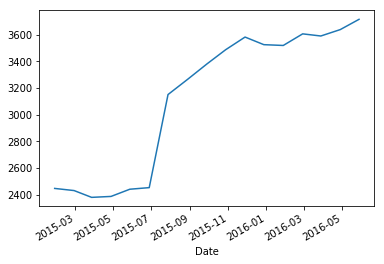

In [24]:
df_new.groupby('Date')['Customer_Code'].count().plot(kind='line')


# Based on above figure we can see the increase in number of accounts over the period from 2015 to 2016.

In [25]:
df_new['Customer_Code'].count()


52996

Finding Patterns in Age of Customers

In [26]:
#converting age to numeric values
df_new["Age"]   = pd.to_numeric(df_new["Age"], errors="coerce")

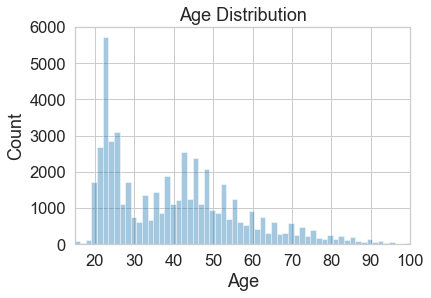

In [27]:
with sns.plotting_context("notebook",font_scale=1.5):
    
    sns.set_style("whitegrid")
    sns.distplot(df_new["Age"].dropna(),
                 bins=80,
                 kde=False)
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

Based on above graph we can see the patterns in 0-30,30-60 and 60-90 range.
We can normize as below:

In [28]:


df_new.loc[df_new.Age < 18,"Age"]  = df_new.loc[(df_new.Age >= 18) & (df_new.Age <= 30),"Age"].mean(skipna=True)
df_new.loc[df_new.Age > 100,"Age"] = df_new.loc[(df_new.Age >= 30) & (df_new.Age <= 100),"Age"].mean(skipna=True)
#df.loc[df.Age > 100,"Age"] = df.loc[(df.Age >= 60) & (df.Age <= 100),"Age"].mean(skipna=True)


df_new["Age"].fillna(df_new["Age"].mean(),inplace=True)
#df["Age"] = df["Age"].astype(int)

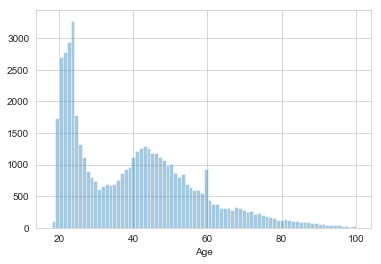

In [29]:
sns.distplot(df_new["Age"].dropna(),
                 bins=80,
                 kde=False)

In [30]:
df_new['Joining_channel'].value_counts().head(15)



KHE    15627
KAT    12617
KFC    12186
KHQ     2374
KFA     1546
KHK      945
KHM      764
KHD      442
KHN      437
KAS      353
KAG      292
RED      280
KAA      272
KAY      266
KAB      254
Name: Joining_channel, dtype: int64

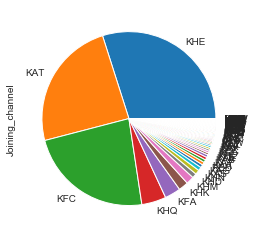

In [31]:
df_new["Joining_channel"].value_counts().plot(x=None, y=None, kind='pie') 



In [32]:
df_a = df_new.loc[:, ['Gender', 'Active_OrNot']].join(df_new.loc[:, "Saving_Account": "Direct_Debit"])


In [33]:
df_a.head()

,Gender,Active_OrNot,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
2406613,H,1.0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0.0,0.0,0
6466267,H,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
10239289,V,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
6681075,V,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2305701,H,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [34]:
df_a = df_a.groupby(['Gender', 'Active_OrNot']).sum()
df_a = df_a.T

In [35]:
df_a

Gender                        H               V         
Active_OrNot                0.0     1.0     0.0      1.0
Saving_Account              1.0     2.0     0.0      3.0
Guarantees                  0.0     1.0     0.0      0.0
Current_Accounts         8620.0  7532.0  8142.0  10309.0
Derivada_Account            0.0     2.0     1.0     18.0
Payroll_Account            20.0  1703.0    27.0   2508.0
Junior_Account             28.0   179.0    50.0    195.0
Más_particular_Account     40.0   169.0    71.0    240.0
particular_Account        793.0  1687.0  1398.0   2953.0
particular_Plus_Account   134.0   750.0   276.0   1118.0
Short_term_deposits         7.0    34.0     5.0     61.0
Medium_term_deposits        0.0    32.0     1.0     39.0
Long_term_deposits          1.0   931.0     8.0   1345.0
e_account                 102.0  1558.0   195.0   2483.0
Funds                       4.0   309.0     3.0    650.0
Mortgage                    0.0    81.0     0.0    197.0
Pensions                    0.0   174.0     4.0    261.0
Loans                       7.0    30.0    26.0     60.0
Taxes                      54.0   871.0   129.0   1675.0
Credit_Card                 2.0   854.0    14.0   1565.0
Securities                  6.0   417.0     7.0    938.0
Home_Account               15.0    58.0    23.0    109.0
Payroll                     1.0  1195.0     4.0   1717.0
Pensions                    1.0  1273.0     6.0   1849.0
Direct_Debit               18.0  2578.0    33.0   4109.0

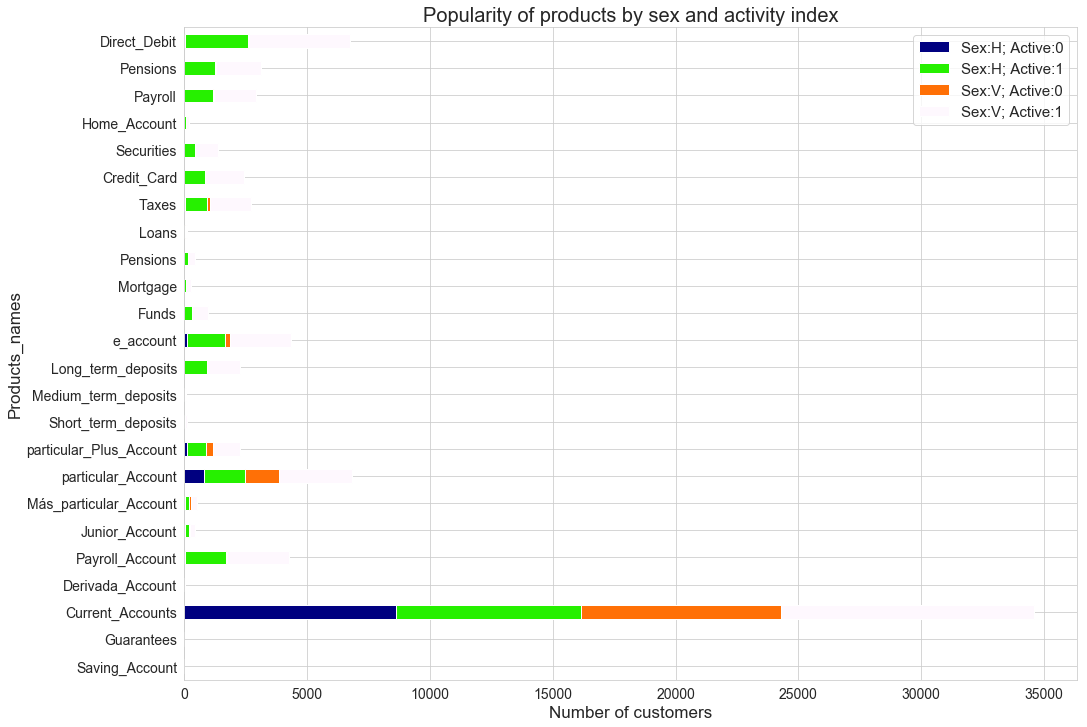

In [36]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Active:0", "Sex:H; Active:1", "Sex:V; Active:0", 
            "Sex:V; Active:1"], prop={'size':15}) 

In [38]:
subset=(df_new.Joining_channel.value_counts()).nlargest(7)


In [39]:
df_g = df_new.loc[:, ['Joining_channel']].join(df_new.loc[:, "Saving_Account": "Direct_Debit"])

subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
df_g = df_g.loc[df_g['Joining_channel'].isin(subset)]
df_g = df_g.groupby("Joining_channel").agg("sum")
df_g=df_g.T

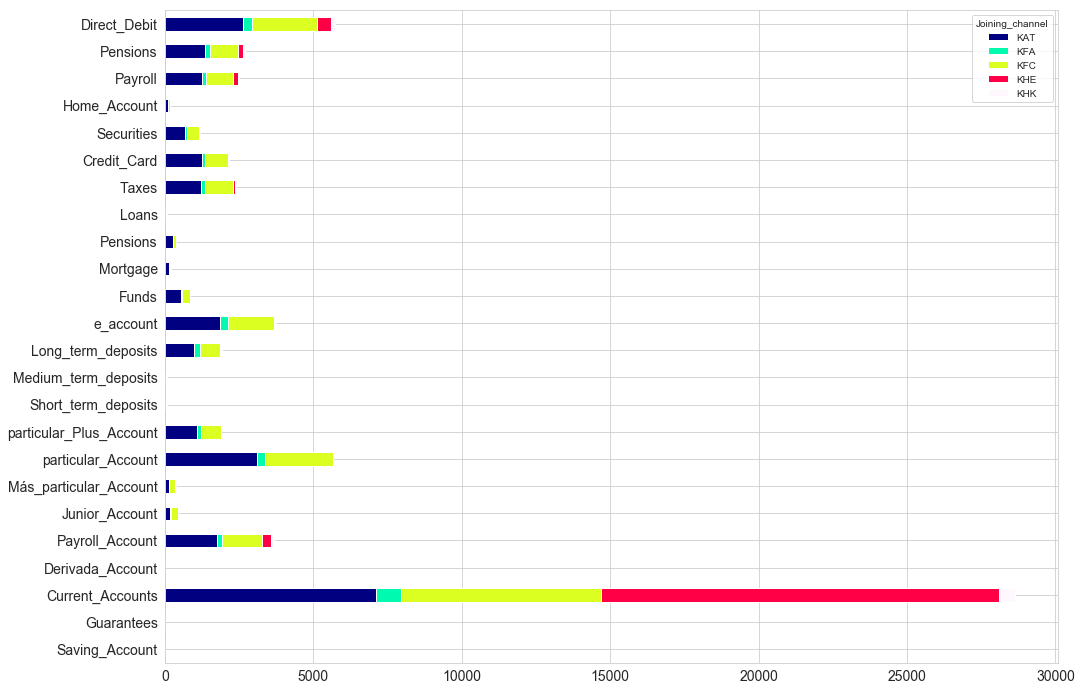

In [40]:
df_g.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')

In [42]:
# Add a new column of the total number of products per customer per month
df_new["tot_products"] = df_new.loc[:,"Saving_Account": "Direct_Debit"].sum(axis=1)
df_new["tot_products"]   = pd.to_numeric(df_new["tot_products"], errors="coerce") 

In [43]:
df_new["tot_products"].value_counts()

1.0     27826
0.0     10046
2.0      7447
3.0      2932
4.0      1776
5.0      1118
6.0       785
7.0       556
8.0       296
9.0       151
10.0       46
11.0       11
12.0        5
13.0        1
Name: tot_products, dtype: int64

In [44]:
# Extract total number of products 
df_a = df_new["tot_products"].value_counts()
df_a = pd.DataFrame(df_a)

# calculate the percentage of customers using different number of products
count = df_new["Customer_Code"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,27826,52.505849
0.0,10046,18.956148
2.0,7447,14.052004
3.0,2932,5.532493
4.0,1776,3.351196
5.0,1118,2.109593
6.0,785,1.481244
7.0,556,1.049136
8.0,296,0.558533
9.0,151,0.284927


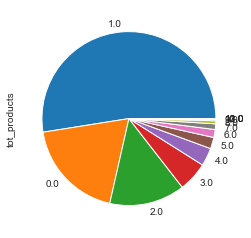

In [45]:
df_new["tot_products"].value_counts().plot(x=None, y=None, kind='pie')

In [46]:
df_age = df_new.groupby(['Age'])['tot_products'].agg('sum')


In [47]:
df_age.head()

Age
18.0      30.0
19.0      67.0
20.0    1321.0
21.0    2260.0
22.0    2478.0
Name: tot_products, dtype: float64

Text(0, 0.5, 'Number of products')

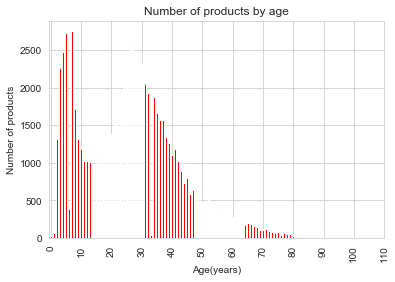

In [48]:
# Number of products by age 
df_age.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

In [49]:
df_seg = df_new.groupby(['Segmentation'])['tot_products'].agg('sum') 
df_seg

Segmentation
01 - TOP               8601.0
02 - PARTICULARES     48937.0
03 - UNIVERSITARIO    19216.0
Name: tot_products, dtype: float64

In [50]:
#Customerondex

In [51]:
df_cust_index = df_new.groupby(['New_Customer_Index'])['tot_products'].agg('count') 
df_cust_index

New_Customer_Index
0.0    49629
1.0     3266
Name: tot_products, dtype: int64

In [52]:
#majority cystomers are regular customers

In [53]:
df_country = df_new.groupby(['Country'])['tot_products'].agg('sum') 

In [54]:
df_country.sort_values(ascending=False).head(10)

Country
ES    76731.0
GB       38.0
FR       36.0
IT       32.0
US       27.0
DE       25.0
CH       24.0
AR       20.0
VE       17.0
CO       13.0
Name: tot_products, dtype: float64

In [55]:
#majority of customers are from ES

In [58]:
df_new.Customer_type_beginning_of_month.unique()

array(['1.0', '1', nan, '3', '3.0', 'P', '2.0', '2'], dtype=object)

In [59]:
df_cust_type = df_new.groupby(['Customer_type_beginning_of_month'])['tot_products'].agg('sum') 

In [60]:
df_cust_type

Customer_type_beginning_of_month
1      23970.0
1.0    52813.0
2          1.0
2.0        1.0
3         10.0
3.0        9.0
P          4.0
Name: tot_products, dtype: float64

In [ ]:
#Majority of customers are active

# Get insight about products based on income

HouseHold_Gross_Income

In [61]:
df_new.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,First_holder_Date,New_Customer_Index,Customer_Seniority,Primary_Customer,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
2406613,2015-04-28,886976,N,ES,H,49.0,2010-07-27,0.0,60,1.0,...,0,0,0,1,0,0,0.0,0.0,0,4.0
6466267,2015-10-28,950206,N,ES,H,24.0,2011-09-28,0.0,49,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
10239289,2016-02-28,474137,N,ES,V,58.0,2004-05-14,0.0,141,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0.0
6681075,2015-10-28,1236387,N,ES,V,34.0,2014-01-07,0.0,21,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
2305701,2015-04-28,1359789,N,ES,H,22.0,2014-11-24,0.0,8,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0


In [63]:
df_new["tot_products"] = df_new.loc[:,"Saving_Account": "Direct_Debit"].sum(axis=1)
df_new["tot_products"]   = pd.to_numeric(df_new["tot_products"], errors="coerce") 

df_a = (df_new.groupby(pd.cut(df_new['HouseHold_Gross_Income'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [64]:
df_a.head()

,Customer_Code,Age,New_Customer_Index,Primary_Customer,primary_address,Province_code,Active_OrNot,HouseHold_Gross_Income,Saving_Account,Guarantees,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
HouseHold_Gross_Income,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",7119830938,279139.394337,278.0,8113.0,7623.0,200266.0,2977.0,3.477129e+08,0,0,...,28,31,262,208,86,15,327.0,348.0,804,9585.0
"[60000.0, 120000.0)",15060033929,710107.998550,552.0,18887.0,17907.0,483676.0,8216.0,1.569010e+09,2,0,...,102,48,900,779,372,72,997.0,1059.0,2310,26052.0
"[120000.0, 180000.0)",6260043988,369226.469747,203.0,9189.0,8601.0,222697.0,4310.0,1.253395e+09,2,0,...,95,15,578,553,313,47,624.0,664.0,1298,14338.0
"[180000.0, 240000.0)",2705255410,178636.138666,73.0,4198.0,4002.0,103356.0,2089.0,8.233797e+08,1,0,...,77,4,318,298,186,22,324.0,354.0,667,7176.0
"[240000.0, inf)",2559730955,182353.842530,51.0,3942.0,3942.0,99051.0,1990.0,1.667407e+09,1,1,...,82,5,366,285,207,27,282.0,320.0,640,6979.0


In [65]:
df_a["tot_products"]



HouseHold_Gross_Income
[0.0, 60000.0)           9585.0
[60000.0, 120000.0)     26052.0
[120000.0, 180000.0)    14338.0
[180000.0, 240000.0)     7176.0
[240000.0, inf)          6979.0
Name: tot_products, dtype: float64

In [66]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "Saving_Account": "Direct_Debit"]
df_a = df_a.T

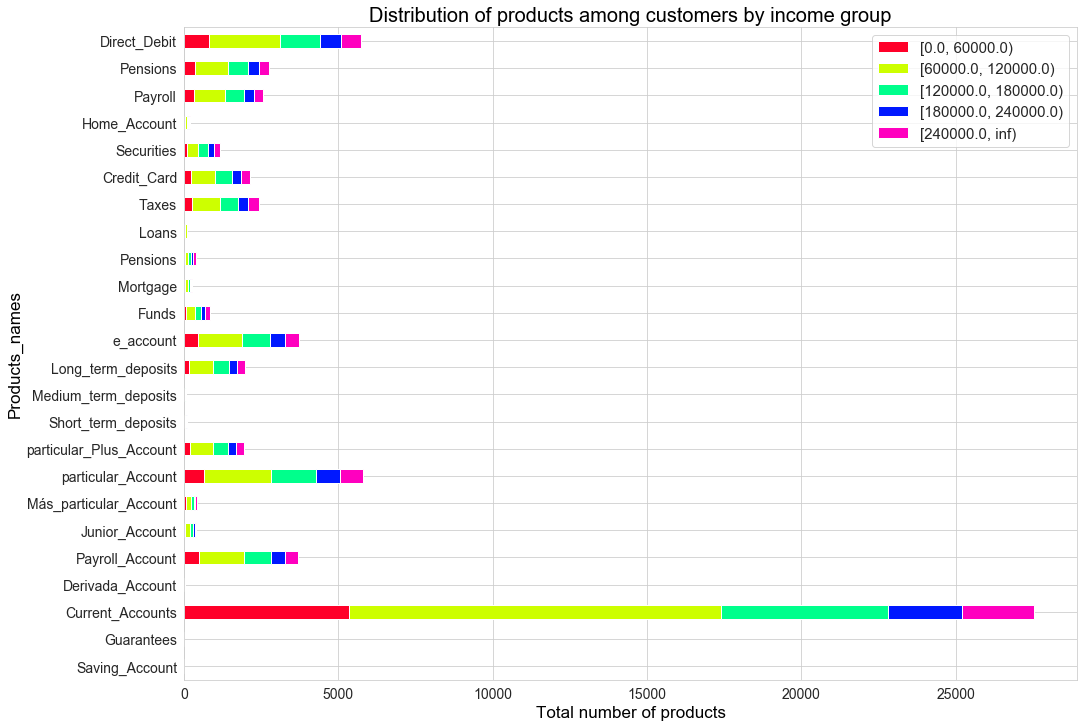

In [67]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [68]:
# Let's create age groups
df_a = (df_new.groupby(pd.cut(df_new['Age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [69]:
# Keep the products columns and discard the others
df_a = df_a.loc[:, "Saving_Account": "Direct_Debit"]
df_a = df_a.T

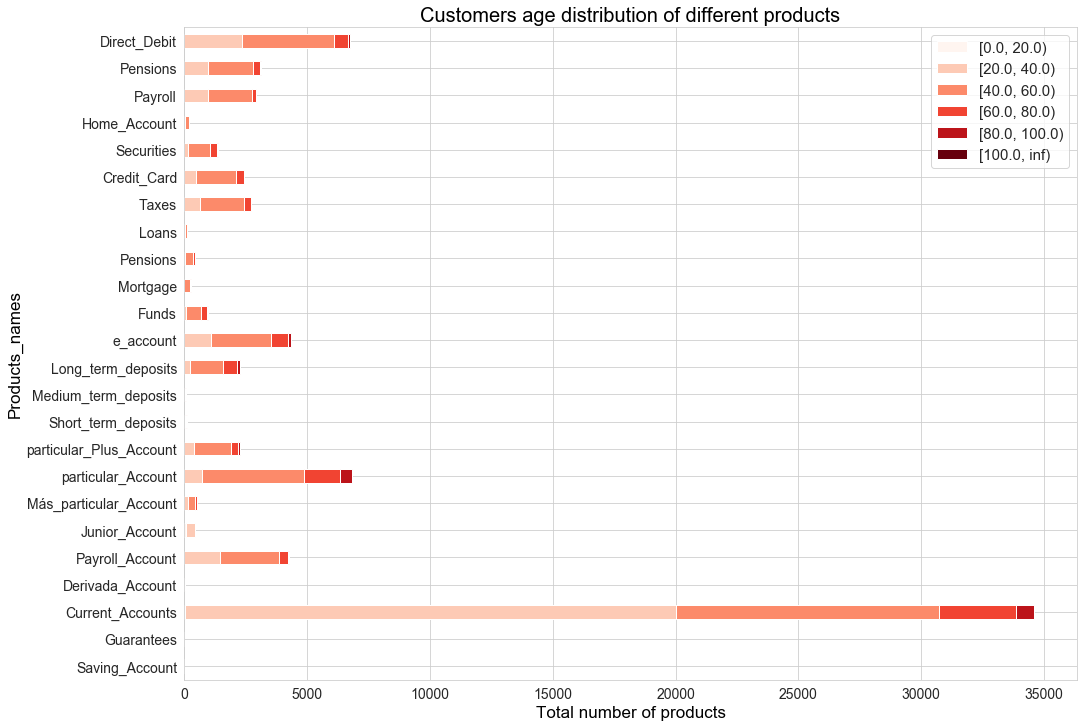

In [70]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

Let's see how many products individual customer usually has in any month



In [71]:
# Extract total number of products 
df_a = df_new["tot_products"].value_counts()
df_a

1.0     27826
0.0     10046
2.0      7447
3.0      2932
4.0      1776
5.0      1118
6.0       785
7.0       556
8.0       296
9.0       151
10.0       46
11.0       11
12.0        5
13.0        1
Name: tot_products, dtype: int64

In [72]:
df_a = pd.DataFrame(df_a)



In [73]:
df_new["Customer_Code"].count()



52996

In [74]:
# calculate the percentage of customers using different number of products
count = df_new["Customer_Code"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,27826,52.505849
0.0,10046,18.956148
2.0,7447,14.052004
3.0,2932,5.532493
4.0,1776,3.351196
5.0,1118,2.109593
6.0,785,1.481244
7.0,556,1.049136
8.0,296,0.558533
9.0,151,0.284927


In [75]:
df_new.columns

Index(['Date', 'Customer_Code', 'Employee_Index', 'Country', 'Gender', 'Age',
       'First_holder_Date', 'New_Customer_Index', 'Customer_Seniority',
       'Primary_Customer', 'Customer_type_beginning_of_month',
       'Customer_relation_month_begining', 'Residence_index',
       'Foreigner_index', 'Joining_channel', 'Deceased_index',
       'primary_address', 'Province_code', 'Province_name', 'Active_OrNot',
       'HouseHold_Gross_Income', 'Segmentation', 'Saving_Account',
       'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'particular_Account',
       'particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions', 'Direct_Debit', 'tot_products'],
      dtype='object')

In [79]:
df_new["Customer_Seniority"]   = pd.to_numeric(df_new["Customer_Seniority"], errors="coerce") 



In [80]:
df_a = df_new.loc[:, ['Age', 'HouseHold_Gross_Income', 'Customer_Seniority']].join(df_new.loc[:, "Saving_Account": "tot_products"])

In [81]:
df_a.head()

,Age,HouseHold_Gross_Income,Customer_Seniority,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
2406613,49.0,98343.03,60.0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0.0,0.0,0,4.0
6466267,24.0,NaN,49.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
10239289,58.0,NaN,141.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,0.0
6681075,34.0,NaN,21.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
2305701,22.0,126999.66,8.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1.0


In [82]:
df_a = df_a.dropna(axis=0)


In [83]:
df_a = df_a.groupby("tot_products").agg("mean")

#df_a.head()

In [84]:
# extract those customers who did not purchase any products in any month
df_a = df_new[df_new["tot_products"]==0]

In [85]:
df_a["Active_OrNot"].value_counts() 

0.0    9953
1.0      69
Name: Active_OrNot, dtype: int64

In [86]:

#As expected majority of customers are inactive

In [87]:
df_a = df_new.loc[:, ['Age', 'HouseHold_Gross_Income', 'Customer_Seniority']].join(df_new.loc[:, 'Saving_Account':'tot_products'])

In [88]:
df_agg = df_a.groupby("tot_products").agg("mean")



In [89]:
df_b = df_agg.loc[:, ['Age', 'HouseHold_Gross_Income', 'Customer_Seniority']]



In [90]:
df_b

,Age,HouseHold_Gross_Income,Customer_Seniority
tot_products,,,
0.0,42.579281,145303.456335,81.933746
1.0,35.095720,123408.011179,58.856870
2.0,48.578639,138946.625121,103.085046
3.0,47.909867,148482.612380,114.033800
4.0,47.348732,155460.178599,118.705915
5.0,47.305254,149930.704615,129.213071
6.0,47.749045,157195.370259,144.135032
7.0,48.075540,153009.634521,152.260791
8.0,47.476351,201968.081504,164.898649


In [91]:
df_sen = df_b["Customer_Seniority"][0:10]

Text(0, 0.5, 'Average seniority')

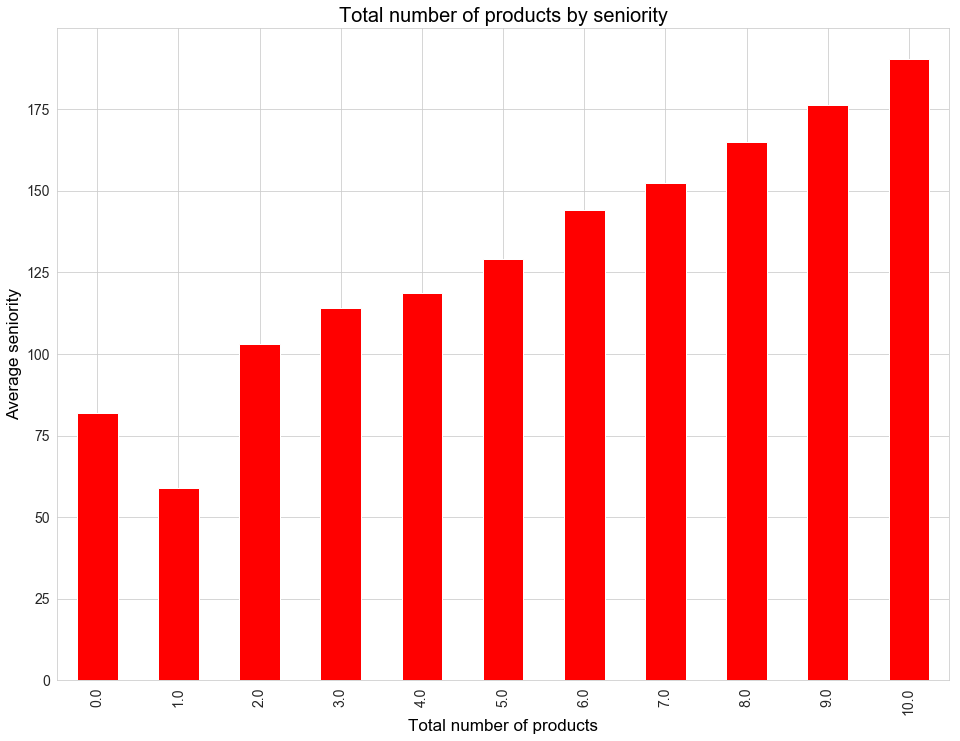

In [92]:
df_sen.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black') 

In [93]:
df_a = df_b["Age"]

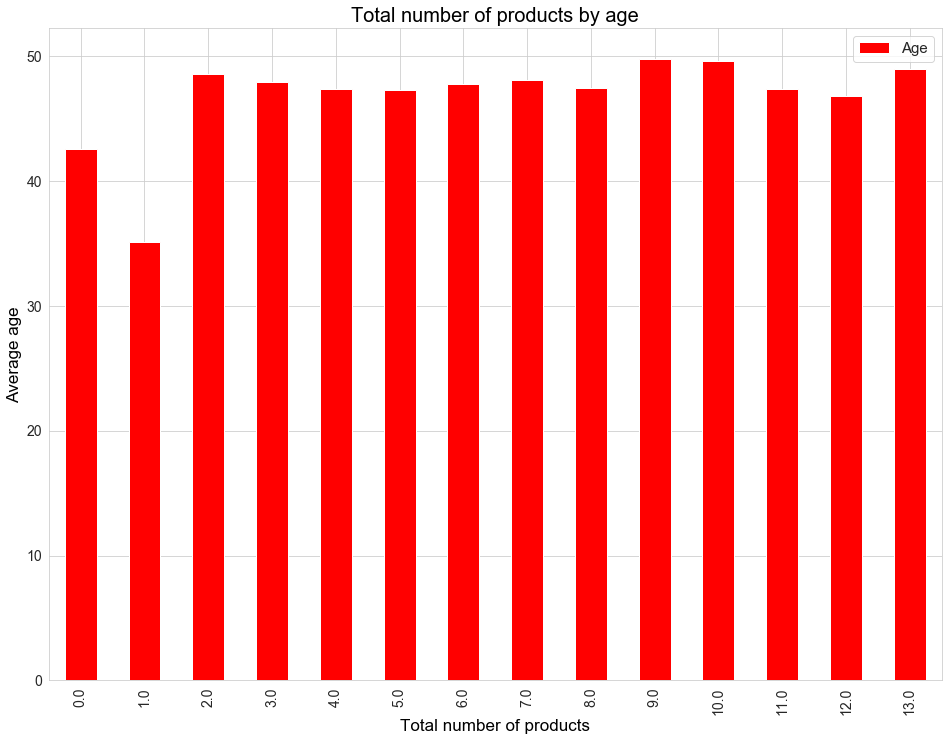

In [94]:
# Total number of products by age
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by age', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average age', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [95]:
df_a = df_b["HouseHold_Gross_Income"]

Text(0, 0.5, 'Average income')

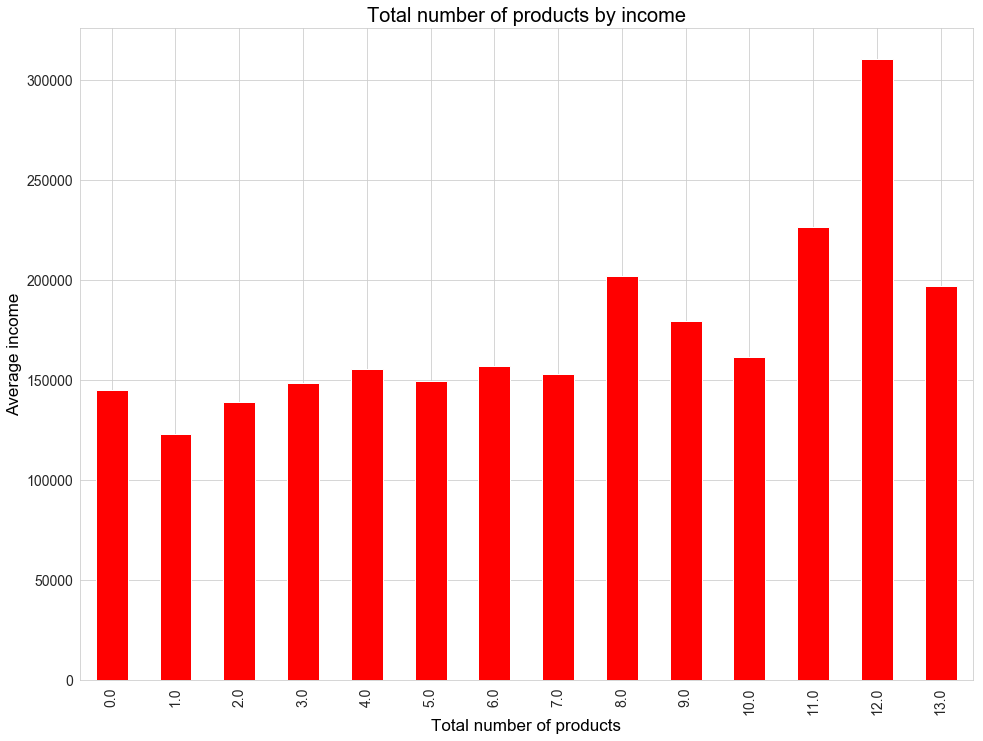

In [96]:
# Total number of products by income
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by income', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average income', fontsize=17, color='black') 
#plt.legend(prop={'size':15}) 

In [97]:
corr=df.corr()

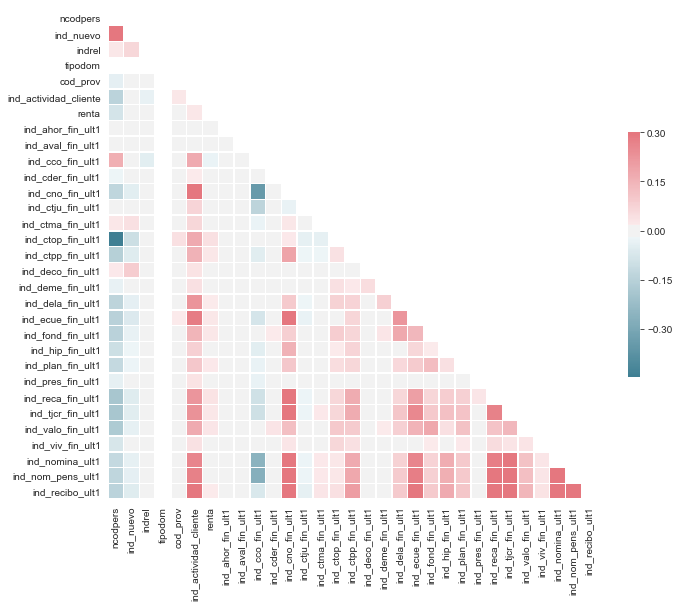

In [98]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Inferential Statistics

1.Total number of products owned by men are more than women

2.People with more income have more accounts


3.People with more Age have more accounts

# Inferential Statistics

# Null Hypothesis=Total number of products owned by men and women are same.
# Alternate Hypotheis = Total numnber of product owned by men and women are different.

In [100]:
df_gen = df_new.groupby(['Gender'])['tot_products'].agg('sum') 



In [ ]:
df_gen.head()

In [ ]:
df_tot=df_new.groupby("Gender")['tot_products'].describe()


In [101]:
df_h = df_new[(df_new['Gender'] == 'H')]
df_h.reset_index(inplace= True)

df_v = df_new[(df_new['Gender'] == 'V')]
df_v.reset_index(inplace= True)

In [102]:
from scipy import stats


In [103]:
stats.levene(df_h['tot_products'], df_v['tot_products'])


LeveneResult(statistic=359.2592994732463, pvalue=7.517628612673258e-80)

The test is significant based on p value , meaning there is no homogeneity of variances so we can conduct a Welch’s t-test.

In [104]:
stats.ttest_ind(df_h['tot_products'], df_v['tot_products'], equal_var = False)

Ttest_indResult(statistic=-15.86769222791799, pvalue=1.4337098447257096e-56)

The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.

# 2.People with more Age have more accounts



In [105]:
df_age = df_new.groupby(['Age'])['tot_products'].agg('sum')



H0 hypothesis: There is a relationship between Age  and Total Products

HA hypothesis: There is not a relationship between Age  and Total Products



In [106]:
df_new[["Age", "tot_products"]].describe()


,Age,tot_products
count,52895.000000,52996.000000
mean,40.241352,1.456582
std,16.865147,1.513714
min,18.000000,0.000000
25%,24.000000,1.000000
50%,39.000000,1.000000
75%,50.000000,2.000000
max,100.000000,13.000000


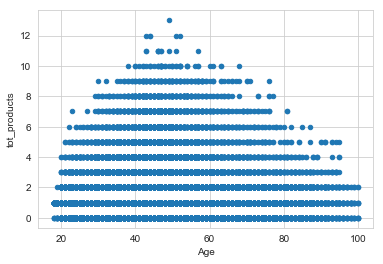

In [107]:
df_new.plot.scatter("Age", "tot_products")


In [108]:
df_new['Age'].corr(df_new['tot_products'])


0.1777673640482441

In [109]:
stats.spearmanr(df_new['Age'], df_new['tot_products'],nan_policy='omit')


SpearmanrResult(correlation=0.2071627968113531, pvalue=masked_array(data=0.,
             mask=False,
       fill_value=1e+20))

In [110]:
stats.kendalltau(df_new['Age'], df_new['tot_products'],nan_policy='omit')


KendalltauResult(correlation=0.15957328067714796, pvalue=0.0)

Based on p-value and correlation we can reject null hypothesis and conclude that there is no relation between
age and number of products owned.

# 2.People with more income have more accounts



In [111]:
df_income = df_new.groupby(['HouseHold_Gross_Income'])['tot_products'].agg('sum')



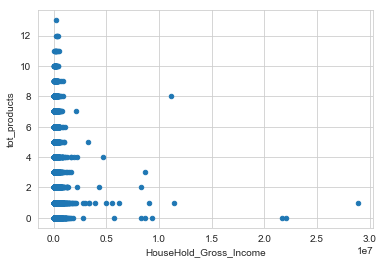

In [112]:
df_new.plot.scatter("HouseHold_Gross_Income", "tot_products")



In [113]:
df_new['HouseHold_Gross_Income'].corr(df_new['tot_products'])



0.027918895924744083

In [114]:
stats.spearmanr(df_new['HouseHold_Gross_Income'], df_new['tot_products'],nan_policy='omit')



SpearmanrResult(correlation=0.09197021062107787, pvalue=masked_array(data=1.04488228e-79,
             mask=False,
       fill_value=1e+20))

In [115]:
stats.kendalltau(df_new['HouseHold_Gross_Income'], df_new['tot_products'],nan_policy='omit')



KendalltauResult(correlation=0.06940088986196809, pvalue=2.5571463514028083e-80)

Based on p-value and correlation we can reject null hypothesis and conclude that there is no relation between
income and number of products owned.

In [116]:
df_new.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,First_holder_Date,New_Customer_Index,Customer_Seniority,Primary_Customer,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
2406613,2015-04-28,886976,N,ES,H,49.0,2010-07-27,0.0,60.0,1.0,...,0,0,0,1,0,0,0.0,0.0,0,4.0
6466267,2015-10-28,950206,N,ES,H,24.0,2011-09-28,0.0,49.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
10239289,2016-02-28,474137,N,ES,V,58.0,2004-05-14,0.0,141.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0.0
6681075,2015-10-28,1236387,N,ES,V,34.0,2014-01-07,0.0,21.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
2305701,2015-04-28,1359789,N,ES,H,22.0,2014-11-24,0.0,8.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0


# Recommender System

In [117]:
df_new.isnull().mean()

Date                                0.000000
Customer_Code                       0.000000
Employee_Index                      0.001906
Country                             0.001906
Gender                              0.001906
Age                                 0.001906
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.001906
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
primary_address                     0.001906
Province_code                       0.006736
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.206072
Segmentation                        0.014341
Saving_Acc

In [119]:
df_new.head()

,Date,Customer_Code,Employee_Index,Country,Gender,Age,First_holder_Date,New_Customer_Index,Customer_Seniority,Primary_Customer,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
2406613,2015-04-28,886976,N,ES,H,49.0,2010-07-27,0.0,60.0,1.0,...,0,0,0,1,0,0,0.0,0.0,0,4.0
6466267,2015-10-28,950206,N,ES,H,24.0,2011-09-28,0.0,49.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
10239289,2016-02-28,474137,N,ES,V,58.0,2004-05-14,0.0,141.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0.0
6681075,2015-10-28,1236387,N,ES,V,34.0,2014-01-07,0.0,21.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
2305701,2015-04-28,1359789,N,ES,H,22.0,2014-11-24,0.0,8.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0


In [120]:


# categorical variables
df_new['Country'] = df_new.Country.astype('category')
df_new['Gender'] = df_new.Gender.astype('category')
df_new['Province_name'] = df_new.Province_name.astype('category')

df_new['Customer_type_beginning_of_month'] = df_new.Customer_type_beginning_of_month.astype('category')

df_new['Customer_relation_month_begining'] = df_new.Customer_relation_month_begining.astype('category')


df_new['Residence_index'] = df_new.Residence_index.astype('category')

df_new['Foreigner_index'] = df_new.Foreigner_index.astype('category')


df_new['Joining_channel'] = df_new.Joining_channel.astype('category')

df_new['Deceased_index'] = df_new.Deceased_index.astype('category')


df_new['primary_address'] = df_new.primary_address.astype('category')

df_new['Segmentation']=df_new.Segmentation.astype('category')
   

In [121]:
df_new.dtypes

Date                                datetime64[ns]
Customer_Code                                int64
Employee_Index                              object
Country                                   category
Gender                                    category
Age                                        float64
First_holder_Date                   datetime64[ns]
New_Customer_Index                         float64
Customer_Seniority                         float64
Primary_Customer                           float64
Customer_type_beginning_of_month          category
Customer_relation_month_begining          category
Residence_index                           category
Foreigner_index                           category
Joining_channel                           category
Deceased_index                            category
primary_address                           category
Province_code                              float64
Province_name                             category
Active_OrNot                   

In [122]:
df_new=df_new.drop(['Customer_Code','Employee_Index','Province_code','primary_address'],axis=1)

In [123]:
#df.isnull().mean()

In [153]:
most_frequent_category = df_new.groupby(['Country'])['Country'].count().sort_values(ascending=False).index[0]



In [154]:
df_new['Country'].fillna(most_frequent_category, inplace=True)

In [155]:
most_frequent_category = df_new.groupby(['Gender'])['Gender'].count().sort_values(ascending=False).index[0]



In [156]:
df_new['Gender'].fillna(most_frequent_category, inplace=True)

In [157]:
df_new['Age'] = df_new['Age'].fillna(df_new['Age'].median())

In [158]:
most_frequent_category = df_new.groupby(['First_holder_Date'])['First_holder_Date'].count().sort_values(ascending=False).index[0]



In [159]:
df_new['First_holder_Date'].fillna(most_frequent_category, inplace=True)

In [160]:
most_frequent_category = df_new.groupby(['New_Customer_Index'])['New_Customer_Index'].count().sort_values(ascending=False).index[0]



In [161]:
df_new['New_Customer_Index'].fillna(most_frequent_category, inplace=True)

In [162]:
df_new['Pensions'] = df_new['Pensions'].fillna(0)

In [163]:
df_new['Payroll'] = df_new['Payroll'].fillna(df_new['Payroll'].median())

In [164]:
df_new['HouseHold_Gross_Income'] = df_new['HouseHold_Gross_Income'].fillna(df_new['HouseHold_Gross_Income'].median())

In [165]:
df_new.isnull().mean()

Date                                0.000000
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.001906
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.000000
Segmentation                        0.014341
Saving_Account                      0.000000
Guarantees                          0.000000
Current_Accounts                    0.000000
Derivada_Account                    0.000000
Payroll_Ac

In [166]:
most_frequent_category = df_new.groupby(['Segmentation'])['Segmentation'].count().sort_values(ascending=False).index[0]

most_frequent_category

'02 - PARTICULARES'

In [167]:
df_new['Segmentation'].fillna(most_frequent_category, inplace=True)

In [168]:
df_new.isnull().mean()

Date                                0.000000
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.001906
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.000000
Segmentation                        0.014341
Saving_Account                      0.000000
Guarantees                          0.000000
Current_Accounts                    0.000000
Derivada_Account                    0.000000
Payroll_Ac

In [146]:
df_new['Segmentation'].dtypes

CategoricalDtype(categories=['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'], ordered=False)

In [147]:
df_new.Segmentation.unique()


[02 - PARTICULARES, 03 - UNIVERSITARIO, 01 - TOP, NaN]
Categories (3, object): [02 - PARTICULARES, 03 - UNIVERSITARIO, 01 - TOP]

In [148]:
df_new['Segmentation'].fillna(most_frequent_category, inplace=True)

In [149]:
df_new.isnull().mean()

Date                                0.000000
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.001906
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.000000
Segmentation                        0.014341
Saving_Account                      0.000000
Guarantees                          0.000000
Current_Accounts                    0.000000
Derivada_Account                    0.000000
Payroll_Ac

In [150]:
indexNames = df_new[df_new['Country'] == 'NaN' ].index
 
# Delete these row indexes from dataFrame
df_new.drop(indexNames , inplace=True)

In [151]:
df_new.isnull().mean()

Date                                0.000000
Country                             0.001906
Gender                              0.001906
Age                                 0.000000
First_holder_Date                   0.001906
New_Customer_Index                  0.001906
Customer_Seniority                  0.001906
Primary_Customer                    0.001906
Customer_type_beginning_of_month    0.011152
Customer_relation_month_begining    0.011152
Residence_index                     0.001906
Foreigner_index                     0.001906
Joining_channel                     0.014190
Deceased_index                      0.001906
Province_name                       0.006736
Active_OrNot                        0.001906
HouseHold_Gross_Income              0.000000
Segmentation                        0.014341
Saving_Account                      0.000000
Guarantees                          0.000000
Current_Accounts                    0.000000
Derivada_Account                    0.000000
Payroll_Ac

# Classifier 

In [169]:
from sklearn.model_selection import train_test_split

df_new.set_index('Date',inplace=True)


In [170]:
df_new.head()

,Country,Gender,Age,First_holder_Date,New_Customer_Index,Customer_Seniority,Primary_Customer,Customer_type_beginning_of_month,Customer_relation_month_begining,Residence_index,...,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit,tot_products
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-28,ES,H,49.0,2010-07-27,0.0,60.0,1.0,1.0,A,S,...,0.0,0,0,1,0,0,0.0,0.0,0,4.0
2015-10-28,ES,H,24.0,2011-09-28,0.0,49.0,1.0,1.0,I,S,...,0.0,0,0,0,0,0,0.0,0.0,0,1.0
2016-02-28,ES,V,58.0,2004-05-14,0.0,141.0,1.0,1.0,I,S,...,0.0,0,0,0,0,0,0.0,0.0,0,0.0
2015-10-28,ES,V,34.0,2014-01-07,0.0,21.0,1.0,1.0,I,S,...,0.0,0,0,0,0,0,0.0,0.0,0,1.0
2015-04-28,ES,H,22.0,2014-11-24,0.0,8.0,1.0,1.0,I,S,...,0.0,0,0,0,0,0,0.0,0.0,0,1.0


In [171]:
#df.iloc[:, 18:42]

In [172]:
df_new.dtypes

Country                                   category
Gender                                    category
Age                                        float64
First_holder_Date                   datetime64[ns]
New_Customer_Index                         float64
Customer_Seniority                         float64
Primary_Customer                           float64
Customer_type_beginning_of_month          category
Customer_relation_month_begining          category
Residence_index                           category
Foreigner_index                           category
Joining_channel                           category
Deceased_index                            category
Province_name                             category
Active_OrNot                               float64
HouseHold_Gross_Income                     float64
Segmentation                              category
Saving_Account                               int64
Guarantees                                   int64
Current_Accounts               

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:, 0:17],df_new.iloc[:, 18:42],test_size=0.3,random_state=0)



In [174]:
X_test.dtypes

Country                                   category
Gender                                    category
Age                                        float64
First_holder_Date                   datetime64[ns]
New_Customer_Index                         float64
Customer_Seniority                         float64
Primary_Customer                           float64
Customer_type_beginning_of_month          category
Customer_relation_month_begining          category
Residence_index                           category
Foreigner_index                           category
Joining_channel                           category
Deceased_index                            category
Province_name                             category
Active_OrNot                               float64
HouseHold_Gross_Income                     float64
Segmentation                              category
dtype: object

In [175]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [176]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X_train, y_train)

ValueError: Multioutput target data is not supported with label binarization

In [177]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

TypeError: no supported conversion for types: (dtype('O'),)